## BUSINESS PROJECT

## Credit Card Fraud Detection


- With this extensive use of credit cards, fraud appears as a major issue in the credit card business.
- Credit card fraud detection relies on the analysis of recorded transactions.

- Fraud detection is a collection of processes and techniques designed to identify, monitor, and prevent fraud.
- Detecting fraud is the first step in identifying where the risk lies. We can then prevent it automatically or even manually using some fraud detection software.

### Challenges in Data :
- Frauds represent a small fraction of all the daily transactions.
- Frauds distribution evolves over time because of seasonality and new attack strategies.

- First of all I am going to providie data for using in Excel, then do some exploratory data analysis. afte that, I am going to do data analysis and aggregating in Excel, and provide multiple plots on Excel and Tableau as well. 

## Data sampling for my project to work with in Excel and Tableau

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_data(path):
    '''
    this function will read the txt file which is a line-delimited json file and produce a pandas dataframe.
    
    '''
    my_list =[]
    with open(path) as f:
        for line in f:
            json_content = json.loads(line)
            my_list.append(json_content)
    #df = pd.DataFrame(my_list) 
    return(pd.DataFrame(my_list))

In [4]:
df = read_data('transactions.txt')

In [5]:
df.tail()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
641909,186770399,186770399,7500.0,2574.02,2016-12-04T12:29:21,5.37,Apple iTunes,US,US,05,...,False,,4925.98,,,,False,,,False
641910,186770399,186770399,7500.0,2568.65,2016-12-09T04:20:35,223.70,Blue Mountain eCards,US,US,09,...,False,,4931.35,,,,False,,,False
641911,186770399,186770399,7500.0,2344.95,2016-12-16T07:58:23,138.42,Fresh Flowers,US,US,02,...,False,,5155.05,,,,False,,,False
641912,186770399,186770399,7500.0,2206.53,2016-12-19T02:30:35,16.31,abc.com,US,US,09,...,False,,5293.47,,,,False,,,False
641913,186770399,186770399,7500.0,2190.22,2016-12-28T11:14:14,32.53,Next Day Online Services,US,US,09,...,False,,5309.78,,,,False,,,False


In [6]:
df.shape

(641914, 29)

- This dataset has 641914 records(observations) and 29 features.

In [7]:
df_copy = df

In [9]:
df_copy.shape

(641914, 29)

In [28]:
mar = df_copy.sample(1300)

In [29]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 382507 to 409262
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             1300 non-null   object 
 1   customerId                1300 non-null   object 
 2   creditLimit               1300 non-null   float64
 3   availableMoney            1300 non-null   float64
 4   transactionDateTime       1300 non-null   object 
 5   transactionAmount         1300 non-null   float64
 6   merchantName              1300 non-null   object 
 7   acqCountry                1300 non-null   object 
 8   merchantCountryCode       1300 non-null   object 
 9   posEntryMode              1300 non-null   object 
 10  posConditionCode          1300 non-null   object 
 11  merchantCategoryCode      1300 non-null   object 
 12  currentExpDate            1300 non-null   object 
 13  accountOpenDate           1300 non-null   object 
 14  d

In [30]:
mar.isFraud.value_counts()

False    1264
True       36
Name: isFraud, dtype: int64

In [32]:
mar.to_csv("Output3.csv")

### Exploratory Data Analysis

In [13]:
# Replacing blank values with nan

df.replace(r'^\s*$', np.nan, regex=True, inplace=True) 

In [14]:
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,10697.210608,6652.828573,135.162497,4044.382035
std,11460.359133,9227.132275,147.053302,5945.510224
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1114.970000,32.320000,502.442500
50%,7500.000000,3578.165000,85.800000,2151.860000
75%,15000.000000,8169.185000,189.030000,5005.890000
max,50000.000000,50000.000000,1825.250000,47496.500000


### Observations:

There are 641914 instances in the dataset. We have some numerical attributes like 'availableMoney', 'creditLimit', and some categorical attributes like 'merchantCategoryCode', 'merchantName'. We have few attributes which totally have missing values. These attributes are:

- echoBuffer
- merchantCity
- merchantState
- merchantZip
- posOnPremises
- recurringAuthInd

I can drop these columns. Some attributes like 'acqCountry' has around 3913 missing values. first, I need to handle these missing values.

#### Handeling missing values

there is few options:

- totally drop those attributes from data.
- Drop those records (remove rows where these attributes are missing)
- Set the missing to some values. For numerical attributes, we can set them to the mean/median, and for categorical attributes we can set them to the most frequent category.

I am going to drop these attributes which totally have missing values from data.

In [15]:
df=df.drop(['echoBuffer','merchantCity','merchantState', 'merchantZip', 'posOnPremises', 
'recurringAuthInd'], axis=1)

In [16]:
df.shape

(641914, 23)

#### Convert to Numeric

In [17]:
# numerical columns
num_cols = ['availableMoney', 'creditLimit', 'currentBalance', 'transactionAmount']

In [18]:
# categorical columns
cate_cols = df.columns.drop('isFraud').drop(num_cols)
# display categorical columns
cate_cols

Index(['accountNumber', 'customerId', 'transactionDateTime', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'cardPresent', 'expirationDateKeyInMatch'],
      dtype='object')

In [19]:
# convert numerical data 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

#### Categorical Feature Unique Values

In [21]:
# check the number of unique values
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

accountNumber                 5000
customerId                    5000
transactionDateTime         635472
merchantName                  2493
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1826
dateOfLastAddressChange       2186
cardCVV                        899
enteredCVV                     980
cardLast4Digits               5134
transactionType                  3
cardPresent                      2
expirationDateKeyInMatch         2
dtype: int64

In [22]:
df.isna().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64

#### let's drop rows which has NaN value

In [23]:
df.dropna(how='any', subset=['acqCountry'], inplace=True)

In [24]:
df.dropna(how='any', subset=['merchantCountryCode'], inplace=True)

In [25]:
df.dropna(how='any', subset=['posEntryMode', 'posConditionCode', 'transactionType'], inplace=True)

In [26]:
df.isna().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

#### Plot

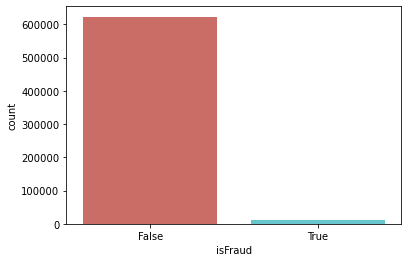

False    622954
True      10892
Name: isFraud, dtype: int64

In [59]:
sns.countplot(x='isFraud', data=df, palette='hls')
plt.show()
df['isFraud'].value_counts()

- This is a histogram of the processed amounts of each transaction, the transactionAmount column.

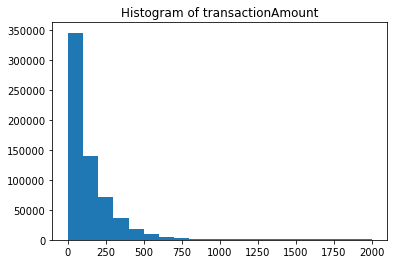

bins are:
[   0  100  200  300  400  500  600  700  800  900 1000 2000]


counts for each bin are:
[345988. 140630.  71564.  36731.  18764.   9807.   5062.   2517.   1380.
    670.    733.]


mean value of transactionAmount is 135.19063562757376
median value of transactionAmount is  85.82


In [50]:

(n, bins,_) = plt.hist(df['transactionAmount'], bins=[0,100,200,300,400,500,600,700,800,900,1000,2000])
plt.title('Histogram of transactionAmount')
#plt.savefig("../results/transActionAmount_histogram.png")
plt.show()
print('bins are:')
print(bins)
print('\n')
print('counts for each bin are:')
print(n)
print('\n')
print('mean value of transactionAmount is {}'.format(np.mean(df['transactionAmount'])))
print('median value of transactionAmount is  {}'.format(np.median(df['transactionAmount'])))

- From the histogram above (also count values for each bin), we observe that it has kind of right-skewed distribution (mean is in the right side of the median). Most of the transactions are concentrated around small values (in the range of [0,100]) and we have few observations for large value of transactions (amount >1000). This is actually what I was expecting from a typical card data. The day to day transactions would be small amounts, but large amounts would happen less frequent. These large amount could happen during special time (vacation travel during summer or holidays, one time big purchases, and so forth).


Text(0, 0.5, 'Frequency of Fraud')

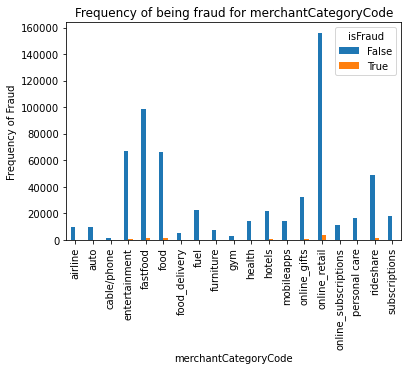

In [51]:
%matplotlib inline
pd.crosstab(df.merchantCategoryCode,df.isFraud).plot(kind='bar')
plt.title('Frequency of being fraud for merchantCategoryCode')
plt.xlabel('merchantCategoryCode')
plt.ylabel('Frequency of Fraud')

In [52]:
df.merchantCountryCode.unique()

array(['US', 'PR', 'MEX', 'CAN'], dtype=object)

Text(0, 0.5, 'Frequency of Fraud')

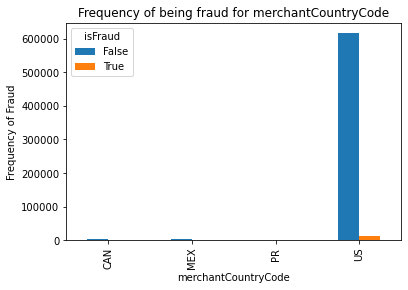

In [53]:
pd.crosstab(df.merchantCountryCode,df.isFraud).plot(kind='bar')
plt.title('Frequency of being fraud for merchantCountryCode')
plt.xlabel('merchantCountryCode')
plt.ylabel('Frequency of Fraud')

- as we can see in the plot, The frequency of being fraud does not depend on the merchantCountryCode. Thus, the merchantCountryCode can't be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Fraud')

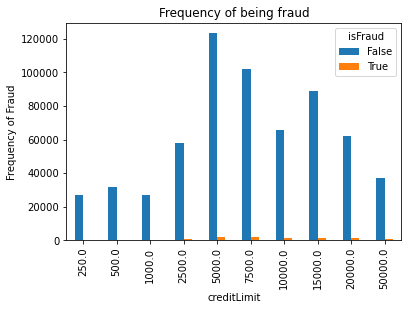

In [54]:
pd.crosstab(df.creditLimit,df.isFraud).plot(kind='bar')
plt.title('Frequency of being fraud')
plt.xlabel('creditLimit')
plt.ylabel('Frequency of Fraud')

- even in this plot, as we can see, The frequency of being fraud does not depend on the creditLimit that much. Thus, the creditLimit either can't be a good predictor of the outcome variable.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


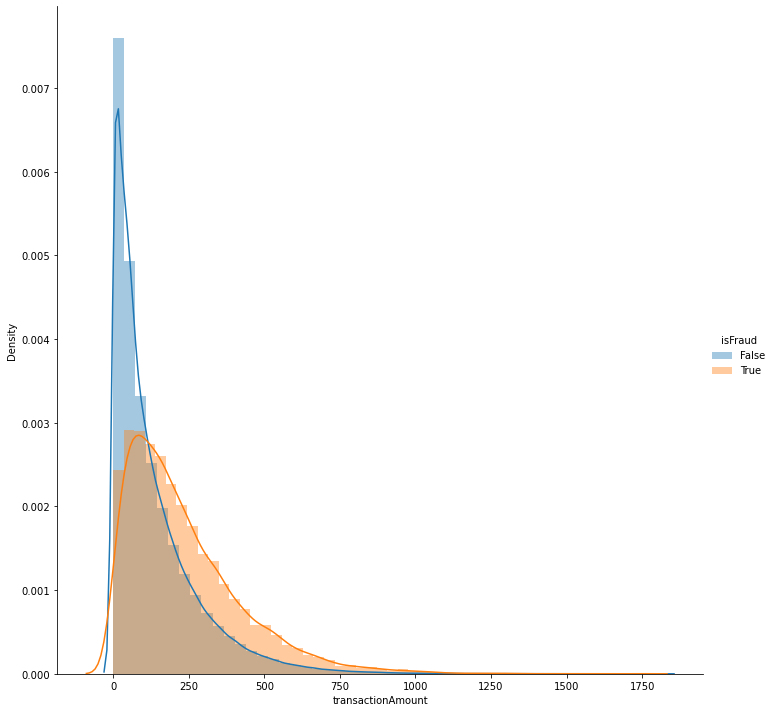

In [66]:
sns.FacetGrid(df, hue="isFraud", size=10).map(sns.distplot, "transactionAmount").add_legend()
plt.show()

- Most of the transaction have amount less than 1000 approximately and all of the fraud transactions have transaction amount less than 1750.

pdf =  [7.38953941e-01 1.83615579e-01 5.43286540e-02 1.61821641e-02
 4.88131186e-03 1.46407803e-03 4.14927285e-04 1.13592261e-04
 3.62864166e-05 9.46602172e-06]


Counts = [4.04850810e-03 1.00597495e-03 2.97650481e-04 8.86572476e-05
 2.67432509e-05 8.02124654e-06 2.27326276e-06 6.22338094e-07
 1.98802447e-07 5.18615078e-08]


Bin edges =  [   0.     182.525  365.05   547.575  730.1    912.625 1095.15  1277.675
 1460.2   1642.725 1825.25 ]


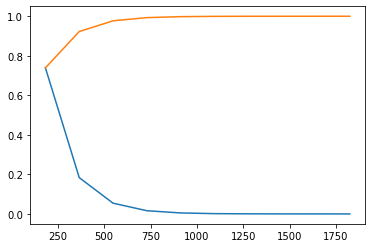

In [67]:
counts, bin_edges = np.histogram(df['transactionAmount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();



- Observations: Probability of the points having transaction amount approximately less than 1750 is 1, it means almost all of the transactions have transaction amount less than 1750 and cdf curve verifies this fact.

#### Now I am going to convert 'transactionDateTime' to an appropriate datetime fotmat that later, we can use it.

In [61]:
# Let's first convert 'transactionDateTime' to an appropriate datetime fotmat that later, we can use it.
dateTime_pdf = df['transactionDateTime'].str.split('T',expand = True)

In [62]:
df['date'] = dateTime_pdf[0]
df['Time'] = dateTime_pdf[1]

In [63]:
df['date'] = dateTime_pdf[0]
df['Time'] = dateTime_pdf[1]
df['dateTime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['Time'].astype(str))
df.sort_values(by=['customerId','accountNumber','dateTime'], inplace=True)

In [64]:
dateTime_pdf.head()

,0,1
0,2016-01-08,19:04:50
1,2016-01-09,22:32:39
2,2016-01-11,13:36:55
3,2016-01-11,22:47:46
4,2016-01-16,01:41:11


In [65]:
df[['customerId','accountNumber','dateTime','transactionAmount','transactionType']].head(10)

,customerId,accountNumber,dateTime,transactionAmount,transactionType
583485,100547107,100547107,2016-01-02 01:47:46,64.66,PURCHASE
583486,100547107,100547107,2016-01-16 23:35:41,5.31,PURCHASE
583487,100547107,100547107,2016-01-17 21:50:04,204.23,PURCHASE
583488,100547107,100547107,2016-01-29 05:19:50,155.28,PURCHASE
583489,100547107,100547107,2016-01-30 20:49:10,91.14,PURCHASE
583490,100547107,100547107,2016-02-06 22:31:44,2.80,PURCHASE
583491,100547107,100547107,2016-02-10 06:48:23,119.77,PURCHASE
583492,100547107,100547107,2016-02-11 08:28:07,211.11,PURCHASE
583493,100547107,100547107,2016-02-20 01:01:47,66.23,PURCHASE
583494,100547107,100547107,2016-02-26 04:02:55,1.06,PURCHASE


### Now let convert isFraud to numberic value.


In [69]:
df['isFraud'] = df['isFraud'].apply(lambda x: 1 if x == True else 0)

### Handle date and datetime

In [ ]:
## Convert our date columns to datetime

In [70]:
## temporally remove date column
date_columns=['accountOpenDate', 'transactionDateTime', 'currentExpDate' , 'dateOfLastAddressChange']
df_date_columns = df[date_columns]

## convert this columns to datetime
df_date_columns['accountOpenDate'] = pd.to_datetime(df_date_columns['accountOpenDate'], format = "%Y-%m-%d")
df_date_columns['transactionDateTime'] = pd.to_datetime(df_date_columns['transactionDateTime'], format = "%Y-%m-%dT%H:%M:%S")
df_date_columns['currentExpDate'] = pd.to_datetime(df_date_columns['currentExpDate'], format = "%m/%Y")
df_date_columns['dateOfLastAddressChange'] = pd.to_datetime(df_date_columns['dateOfLastAddressChange'], format = "%Y-%m-%d")
df_date_columns.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,accountOpenDate,transactionDateTime,currentExpDate,dateOfLastAddressChange
583485,2011-10-30,2016-01-02 01:47:46,2030-02-01,2011-10-30
583486,2011-10-30,2016-01-16 23:35:41,2023-01-01,2011-10-30
583487,2011-10-30,2016-01-17 21:50:04,2029-06-01,2011-10-30
583488,2011-10-30,2016-01-29 05:19:50,2020-12-01,2011-10-30
583489,2011-10-30,2016-01-30 20:49:10,2027-01-01,2011-10-30


In [73]:
# remove categorial columns from df_clean and concat df_date_clean
df_clean = df.drop(date_columns, axis=1)
df_clean = pd.concat([df_clean, df_date_columns], axis=1)
df_clean.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,currentBalance,cardPresent,expirationDateKeyInMatch,date,Time,dateTime,accountOpenDate,transactionDateTime,currentExpDate,dateOfLastAddressChange
583485,100547107,100547107,2500.0,2500.00,64.66,Popeyes #414406,US,US,09,01,...,0.00,True,False,2016-01-02,01:47:46,2016-01-02 01:47:46,2011-10-30,2016-01-02 01:47:46,2030-02-01,2011-10-30
583486,100547107,100547107,2500.0,2435.34,5.31,Popeyes #700785,US,US,80,01,...,64.66,True,False,2016-01-16,23:35:41,2016-01-16 23:35:41,2011-10-30,2016-01-16 23:35:41,2023-01-01,2011-10-30
583487,100547107,100547107,2500.0,2430.03,204.23,Arbys #46046,US,US,02,01,...,69.97,True,False,2016-01-17,21:50:04,2016-01-17 21:50:04,2011-10-30,2016-01-17 21:50:04,2029-06-01,2011-10-30
583488,100547107,100547107,2500.0,2225.80,155.28,Shake Shack #968081,US,US,05,08,...,274.20,True,False,2016-01-29,05:19:50,2016-01-29 05:19:50,2011-10-30,2016-01-29 05:19:50,2020-12-01,2011-10-30
583489,100547107,100547107,2500.0,2070.52,91.14,In-N-Out #27394,US,US,09,01,...,429.48,True,False,2016-01-30,20:49:10,2016-01-30 20:49:10,2011-10-30,2016-01-30 20:49:10,2027-01-01,2011-10-30


#### future work: 
- In the future, with Machine Learning (ML) techniques It can be efficiently discovered fraudulent patterns and predict transactions that are most likely to be fraudulent.